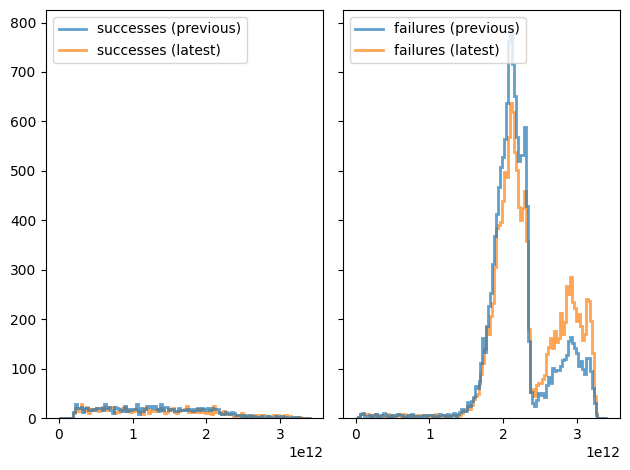

In [2]:
import subprocess

import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

NUM_SEEDS = 16384

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

prev_success = []
prev_failure = []
for line in subprocess.run(
    ['cargo', 'run', '--release', '--', f'--num-seeds={NUM_SEEDS}', '--github-user=fenhl', '--rev=dfcee638d7785bd1dd84d60501964b1ff0cb35cb', '--preset=fenhl_tootr', 'bench', '--raw-data'],
    stdout=subprocess.PIPE, encoding='utf-8', check=True,
).stdout.splitlines():
    if line.startswith('s'):
        prev_success.append(int(line[2:]))
    else:
        prev_failure.append(int(line[2:]))

latest_success = []
latest_failure = []
for line in subprocess.run(
    ['cargo', 'run', '--release', '--', f'--num-seeds={NUM_SEEDS}', '--github-user=fenhl', '--rev=eeee65075c53a05e43f18ecc4bf4105955f76ac7', '--preset=fenhl_tootr', 'bench', '--raw-data'],
    stdout=subprocess.PIPE, encoding='utf-8', check=True,
).stdout.splitlines():
    if line.startswith('s'):
        latest_success.append(int(line[2:]))
    else:
        latest_failure.append(int(line[2:]))

num_bins = int(np.ceil(np.sqrt((len(prev_success) + len(prev_failure) + len(latest_success) + len(latest_failure)) / 2)))
bins = np.linspace(0, max(max(prev_success), max(prev_failure), max(latest_success), max(latest_failure)), num_bins)

axs[0].hist([prev_success, latest_success], bins, histtype='step', linewidth=2, alpha=0.7, label=['successes (previous)', 'successes (latest)'])

axs[1].hist([prev_failure, latest_failure], bins, histtype='step', linewidth=2, alpha=0.7, label=['failures (previous)', 'failures (latest)'])
axs[1].legend(loc='upper left')

for ax in axs:
    # Edit legend to get lines as legend keys instead of the default polygons
    # and sort the legend entries in alphanumeric order
    handles, labels = ax.get_legend_handles_labels()
    leg_entries = {}
    for h, label in zip(handles, labels):
        leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1],
                                    alpha=h.get_alpha(), lw=h.get_linewidth())
    labels, lines = zip(*reversed(leg_entries.items()))
    ax.legend(lines, labels, loc='upper left')
